In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# import fashion mnist data
# import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
#expand the dimension of the data
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

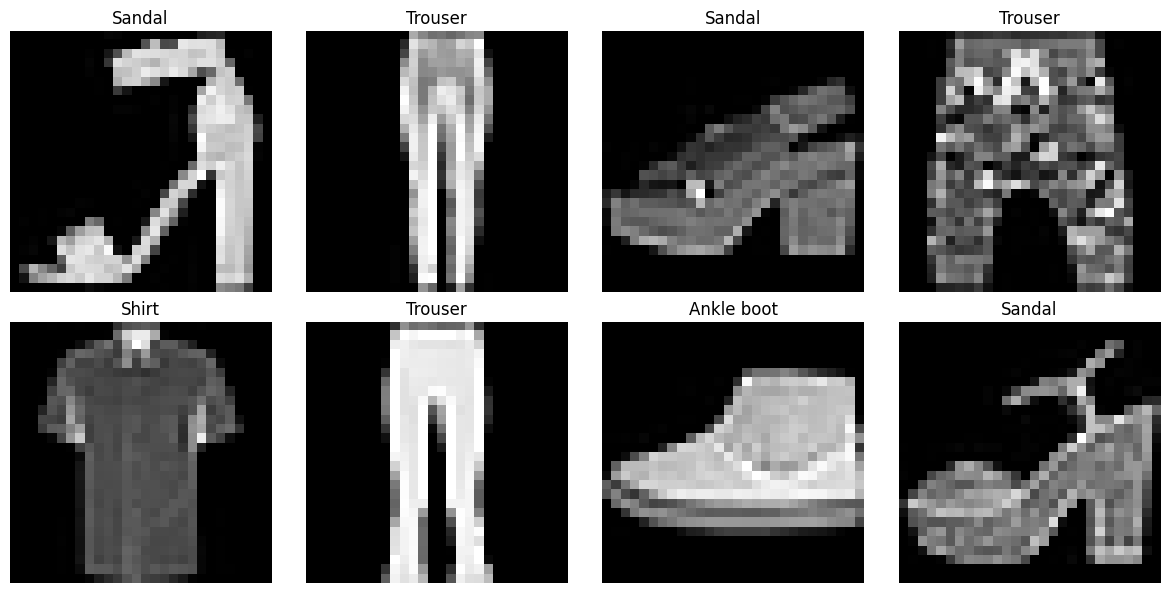

In [7]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
row, col = 2, 4
x_len = x_train.shape[0]
fig, axes = plt.subplots(row, col, figsize = (12, 6))
for i in range(row * col):
    image_index = np.random.randint(0, x_len)
    ax = axes[i//col, i%col]
    
    ax.imshow(x_train[image_index].reshape(28, 28), cmap = 'gray')
    ax.set_title(class_name[y_train[image_index]])
    ax.set_xlabel(f"True: {class_name[y_train[image_index]]}", fontsize = 12, color = 'blue')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# SVM Classification
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train.reshape(-1, 28*28))
x_test_std = scaler.transform(x_test.reshape(-1, 28*28))

In [9]:
for kernel in kernel_types:
    for C in C_values:
        svm_classifier = SVC(kernel=kernel, C=C)
        svm_classifier.fit(x_train_std, y_train)
        y_pred = svm_classifier.predict(x_test_std)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Kernel: {kernel}, C: {C}, Accuracy: {accuracy:.4f}')

Kernel: linear, C: 0.1, Accuracy: 0.8456
Kernel: linear, C: 1, Accuracy: 0.8369
